# Impression Predictions

### Objective: Listing Impression Predictions

Nearly New Nautical is a (fictional) website that allows users to advertise their used boats for sale. When users list their boat, they have to provide a range of information about their boat. Boats that get lots of views bring more traffic to the website, and more potential customers. To boost traffic to the website, the product manager wants to prevent listing boats that do not receive many views.

Create a prediction for the number of views a listing will receive based on the boat's features?

### Success Criteria
Create a model that is, on average, less than 50% off of the true number of views a listing received.


### Summary
Listings that are more expensive, located in Switzerland, have a larger area, and were built more recently tend to drive website traffic the most

Using this algorithm, we can predict within 46% the number of views a listing will have. 
With this information, we can choose to focus our attention on providing the best options for our consumers. 

# Import Packages and Data
The imported data contains information from 9,888 boat listings and there are 9 different attributes for each boat

In [1]:
# Import packages for analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_raw = pd.read_csv("data/boat_data.csv")
df_raw.rename(columns = {"Number of views last 7 days": "Views"},inplace = True)
print("The size of the data is: {}".format(df_raw.shape))
df_raw.head(20)

The size of the data is: (9888, 10)


,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Views
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58
5,CHF 3650,Sport Boat,Linder power boats,new boat from stock,0,4.03,1.56,Aluminium,Switzerland Â» Lake Constance Â» Uttwil,132
6,CHF 3600,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474
7,DKK 24800,Sport Boat,NaN,Used boat,0,3.00,NaN,NaN,Denmark Â» Svendborg,134
8,EUR 3333,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,NaN,Germany Â» Bayern Â» Boote+service Oberbayern,45
9,EUR 3300,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,NaN,Italy Â» Dormelletto,180


# Data Exploration and Feature Engineering

### Summary of data changes
- Views: Filter 749 outliers using 1.5*interquartile range
- Price: Boats are listed in 5 different currencies, for accurate comparison, all currencies were converted to Euros
- Boat Type was condensed into top 9 categories plus an other which accounted for the extra 12.5% of listings
- Manufacturer: No change but excluded from model because it provided too much noise and wasn't easy to condense
- Type was separated into two columns
	- Sale type: Contained information about the listing being new, used, or from a display
    - Fuel type: Contained information about the boat running on diesel, unleaded, or another fuel source
- Year Built: 551 missing values were tagged as zero and removed because assumed missing
- Boat dimensions: Length and Width not changed
- Material: not changed
- Location: Country was pulled out and condensed into top 9 countries plus an other which accounted for the extra 8.5% of listings


See below for more in-depth examination and validation of data

## Number of Views

Then number of views is the main dependent variable for the model. First, I want to check the distribution of the data to make sure that I will be able to fit a model. Upon review, it appears there are 749 outliers based on 1.5*interquartile range. 


After filtering out the outliers, the sample size drops from 9,888 to 9,139, a loss of 7.56%. Upon review of the distribution, the data are still skewed but they are much less skewed than before and I will leave them this way because we want our model to reflect the real-world problem and the reality of our business is that the data are skewed. 

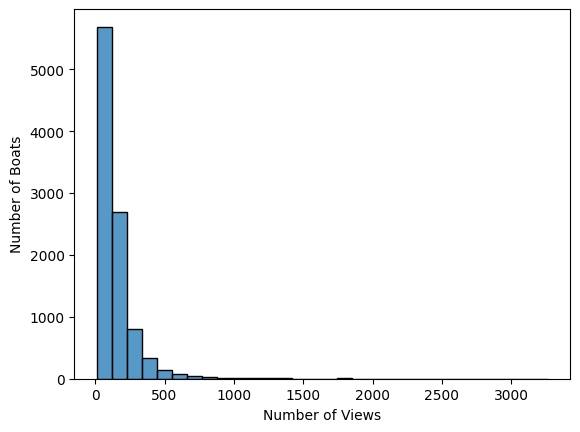

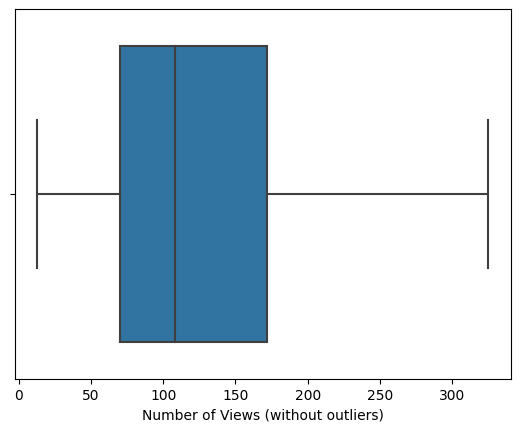

In [3]:
# Visualize the data before filtering out the views. 
sns.histplot(x = 'Views', data = df_raw,bins = 30)
plt.ylabel('Number of Boats')
plt.xlabel('Number of Views')
plt.show()
sns.boxplot(x = 'Views', data = df_raw, showfliers = False)
plt.xlabel('Number of Views (without outliers)')
plt.show()
#sns.displot(df_raw, x= 'Views',stat = 'density')

In [4]:
# Get sample size as well as metrics for the outlier detection. 
df_raw['Views'].describe()

count    9888.000000
mean      149.160801
std       151.819752
min        13.000000
25%        70.000000
50%       108.000000
75%       172.000000
max      3263.000000
Name: Views, dtype: float64

In [5]:
q1=df_raw['Views'].quantile(0.25)
q3=df_raw['Views'].quantile(0.75)
IQR=q3-q1

outliers = df_raw[df_raw['Views'] > (q3 + 1.5*IQR)]
print("There are {} outliers based on website views".format(outliers.shape[0]))

There are 749 outliers based on website views


In [6]:
# Perform the outlier filter
df_raw = df_raw[df_raw['Views'] < (q3 + 1.5*IQR)]

<AxesSubplot:xlabel='Views', ylabel='Count'>

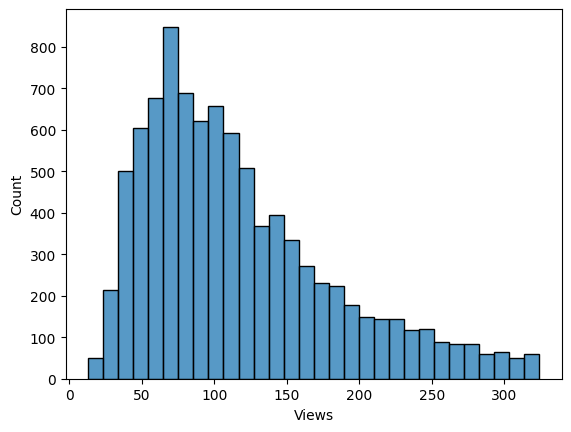

In [7]:
# Plot the new distribution of website views
sns.histplot(x = 'Views', data = df_raw,bins = 30)

## Price

When thinking about price, it makes the most sense to split the price into two features including 1) the currency and 2) the currency amount. That way, the model can take both of those aspects into account easier. Once it has been split into its currency price and numerical price pieces, I can convert all of the price values into euros so that there is a single standardized metric of boat sale price, that reflects value not country differences.  

In [8]:
# Split the price into a currency and numerical price
df_raw[['Currency','Price_num']] = df_raw['Price'].str.split(' ',expand = True)
df_raw['Price_num'] = df_raw['Price_num'].astype(int)
df_raw[['Price','Currency','Price_num']].head()

,Price,Currency,Price_num
0,CHF 3337,CHF,3337
1,EUR 3490,EUR,3490
2,CHF 3770,CHF,3770
3,DKK 25900,DKK,25900
4,EUR 3399,EUR,3399


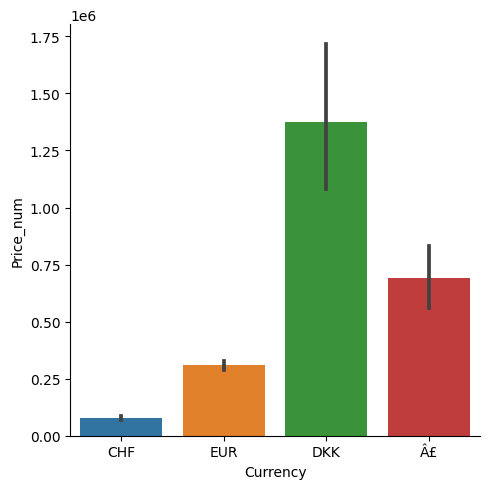

In [9]:
# Visualize the distribution between of price for each currency
sns.catplot(x = "Currency",y = "Price_num",data = df_raw, kind = 'bar')

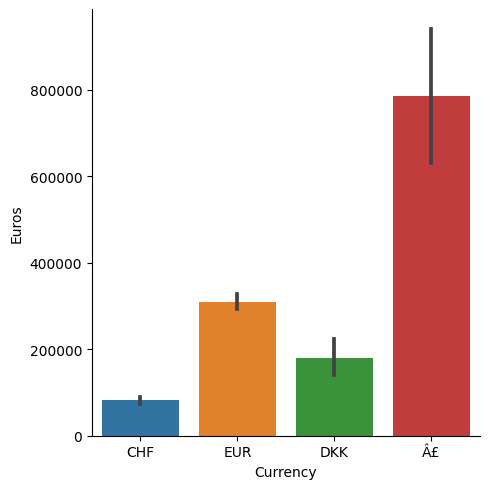

In [10]:
# Because some of the currencies are naturally worth more than others, I will standardize all price values into euros for a more standard measure of monetary worth.
df_raw['Euros'] = np.where(df_raw['Currency'].str.contains('CHF',case = False),df_raw['Price_num']*1.05,
                  np.where(df_raw['Currency'].str.contains('DKK',case = False),df_raw['Price_num']*0.13,
                  np.where(df_raw['Currency'].str.contains('Â£', case = False),df_raw['Price_num']*1.14,df_raw['Price_num'])))
sns.catplot(x = "Currency",y = "Euros",data = df_raw, kind = 'bar')

## Boat Type

From the data below, we see that over 50% of the boats belong within the top 3 categories (Motor, Sport, and Flybridge), and almost 90% of the entries are within the top 10 categories. 

To clean up the boat type, I am going simplify down to the top 9 categories plus an "Other", for a total of 10. In looking closer at the data, it seems that some of the boats within those 9 could be recategorized (e.g., "Classic, Motor Yacht" --> "Motor Yacht") so I will do a big case statement to categorize those top 9 and an other which should catch some of the nuances within the data. Also note, that priority is given for the biggest categories, so if a boat is tagged both as a motor yacht and a sport boat, it is recategorized as a motor yacht.

In [11]:
boat_counts = df_raw.groupby(['Boat Type']).size().reset_index(name = 'counts').sort_values(['counts'],ascending = False)
boat_counts['Cumulative'] = boat_counts['counts'].cumsum() / df_raw.shape[0]
boat_counts

,Boat Type,counts,Cumulative
63,Motor Yacht,2593,0.283978
81,Sport Boat,1257,0.421641
53,Flybridge,1162,0.548899
85,Trawler,667,0.621947
74,Pilothouse,579,0.685358
...,...,...,...
36,"Classic,Motor Yacht,Passenger boat",1,0.999562
9,"Cabin Boat,Fishing Boat,Pilothouse",1,0.999671
34,"Classic,Mega Yacht",1,0.999781
65,"Motor Yacht,Sport Boat,Water ski",1,0.999890


In [12]:
# Condense the boat type into a more simple form to not confuse the later algorithm with noise
df_raw['CLEAN Boat Type'] = np.where(df_raw['Boat Type'].str.contains("Motor Yacht"), 'Motor Yacht',
                            np.where(df_raw['Boat Type'].str.contains("Sport Boat"), 'Sport Boat',
                            np.where(df_raw['Boat Type'].str.contains("Flybridge"), 'Flybridge',
                            np.where(df_raw['Boat Type'].str.contains("Trawler"), 'Trawler',
                            np.where(df_raw['Boat Type'].str.contains("Pilothouse"), 'Pilothouse',
                            np.where(df_raw['Boat Type'].str.contains("Cabin Boat"), 'Cabin Boat',
                            np.where(df_raw['Boat Type'].str.contains("Hardtop"), 'Hardtop',
                            np.where(df_raw['Boat Type'].str.contains("Center console boat"), 'Center console boat',
                            np.where(df_raw['Boat Type'].str.contains("Bowrider"), 'Bowrider','Other')))))))))

In [13]:
# Show the counts for the condensed boat type
clean_boat_counts = df_raw.groupby(['CLEAN Boat Type']).size().reset_index(name = 'counts').sort_values(['counts'],ascending = False)
clean_boat_counts['Cumulative'] = clean_boat_counts['counts'].cumsum() / df_raw.shape[0]
clean_boat_counts

,CLEAN Boat Type,counts,Cumulative
5,Motor Yacht,2636,0.288687
8,Sport Boat,1290,0.429964
3,Flybridge,1171,0.558208
6,Other,1144,0.683496
9,Trawler,675,0.757420
7,Pilothouse,583,0.821268
1,Cabin Boat,500,0.876027
4,Hardtop,489,0.929581
2,Center console boat,367,0.969773
0,Bowrider,276,1.000000


### Manufacturer

Since there are 852 different manufacturers and none of them are a clear majority producer of the listed boats, I am actually going to exclude this feature from my model. I could leave it as is and then create a dummy-variable with it but I think that it would create too much noise in the model since it doesn't appear to me that any manufacturer is significantly driving views.

In [14]:
#mfg_counts = df_raw.groupby(['Manufacturer']).size().reset_index(name = 'counts').sort_values(['counts'],ascending = False)
#mfg_counts['Cumulative'] = mfg_counts['counts'].cumsum() / df_raw.shape[0]
#mfg_counts


mfg_counts = df_raw.groupby(['Manufacturer'])['Views'].agg(['count','sum'])
mfg_counts['View_per_listing'] = mfg_counts['sum'] / mfg_counts['count']
mfg_counts.sort_values(['sum'],ascending = False)
# Count is the number of listings, and sum is the number of views

,count,sum,View_per_listing
Manufacturer,,,
BÃ©nÃ©teau power boats,624,50741,81.315705
Jeanneau power boats,524,44114,84.187023
Sunseeker power boats,362,38723,106.969613
Princess power boats,227,28031,123.484581
Sea Ray power boats,204,25773,126.338235
...,...,...,...
Nautica power boats,1,35,35.000000
Ventus power boats,1,34,34.000000
Suzuki power boats,1,33,33.000000


## Type

From data exploration, it seems that there are two different metrics within the boat type. First is whether the boat is new, used, or a display model and second is the fuel type such as diesel, unleaded, propane, hybrid or electric so I am going to separate this boat type into two different columns to better capture that nuance in my model.

Unfortunately, a large number of gas types were not specified, so I will leave these as blank and I will assess missing value counts later on. 

In [15]:
type_counts = df_raw.groupby(['Type']).size().reset_index(name = 'counts').sort_values(['counts'],ascending = False)
type_counts['Cumulative'] = type_counts['counts'].cumsum() / df_raw.shape[0]
type_counts

,Type,counts,Cumulative
9,"Used boat,Diesel",3930,0.430402
8,Used boat,1405,0.584273
14,"Used boat,Unleaded",1300,0.726645
19,"new boat from stock,Unleaded",1071,0.843938
15,new boat from stock,647,0.914796
16,"new boat from stock,Diesel",275,0.944913
22,"new boat on order,Unleaded",148,0.961121
5,"Display Model,Unleaded",69,0.968678
20,new boat on order,57,0.974921
0,Diesel,56,0.981054


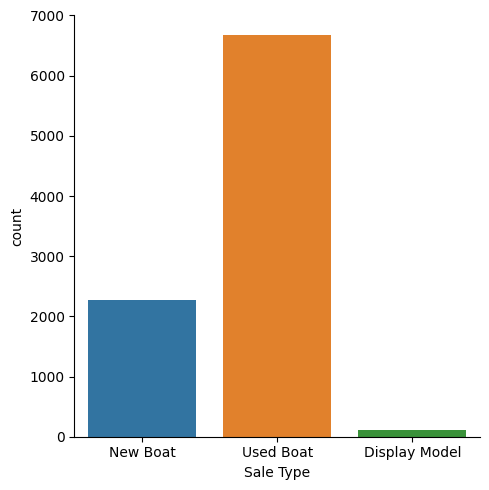

In [16]:
df_raw['Sale Type'] = np.where(df_raw['Type'].str.contains('new',case = False),'New Boat',
                      np.where(df_raw['Type'].str.contains('used',case = False),'Used Boat',
                      np.where(df_raw['Type'].str.contains('display',case = False),'Display Model',None)))
sns.catplot('Sale Type', data = df_raw, kind = 'count')

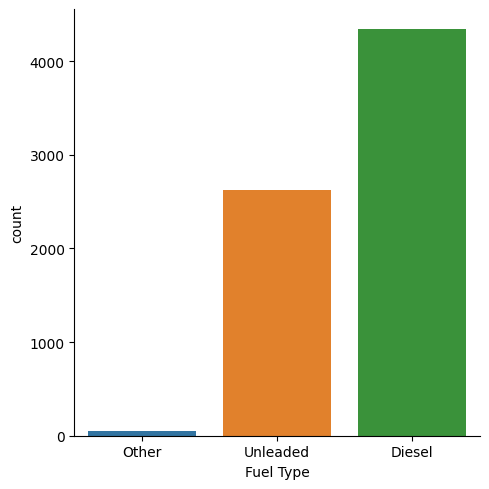

In [17]:
df_raw['Fuel Type'] = np.where(df_raw['Type'].str.contains('diesel',case = False),'Diesel',
                      np.where(df_raw['Type'].str.contains('unleaded',case = False),'Unleaded',
                      np.where(df_raw['Type'].str.contains('gas',case = False),'Unleaded',
                      np.where(df_raw['Type'].str.contains('electric',case = False),'Other',
					  np.where(df_raw['Type'].str.contains('propane',case = False),'Other',
                      np.where(df_raw['Type'].str.contains('hybrid',case = False),'Other',None))))))
sns.catplot('Fuel Type', data = df_raw, kind = 'count')

## Year Built

It looks like all of these values are okay except that there are 551 missing values coded as zero so these need to be tagged as missing and examined later on. 

In [18]:
year_counts = df_raw.groupby(['Year Built']).size().reset_index(name = 'counts').sort_values(['Year Built'],ascending = False)
year_counts['Cumulative'] = year_counts['counts'].cumsum() / df_raw.shape[0]
print(year_counts)

     Year Built  counts  Cumulative
120        2021      47    0.005147
119        2020    1217    0.138430
118        2019     631    0.207535
117        2018     346    0.245428
116        2017     296    0.277845
..          ...     ...         ...
4          1897       1    0.941737
3          1895       1    0.941846
2          1889       1    0.941956
1          1885       1    0.942065
0             0     529    1.000000

[121 rows x 3 columns]


In [19]:
df_raw['Year Built'] = df_raw['Year Built'].replace(0,np.nan)

### Boat Dimensions

As can be seen from the correlation coefficient and scatter plot, the linear relationship between the length and width is strongly positive, with a correlation of .87. While there are a few outliers, I am going to leave these dimensions as is 

In [20]:
df_raw[['Length','Width']].corr()

,Length,Width
Length,1.000000,0.873185
Width,0.873185,1.000000


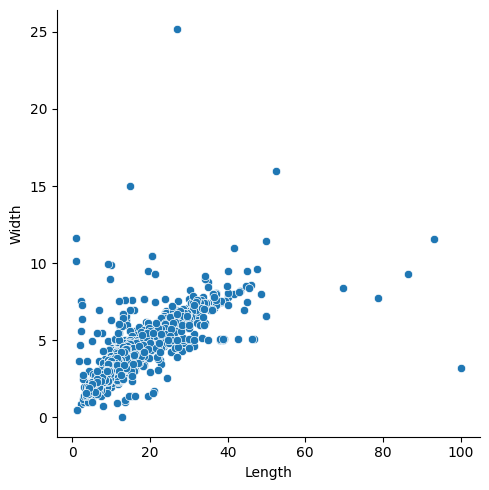

In [21]:
sns.relplot(x = 'Length', y ='Width', data = df_raw, kind = 'scatter')

### Material

Although there is a wide variation of material types, I am going to leave this column as is in order to capture the nuance between the types

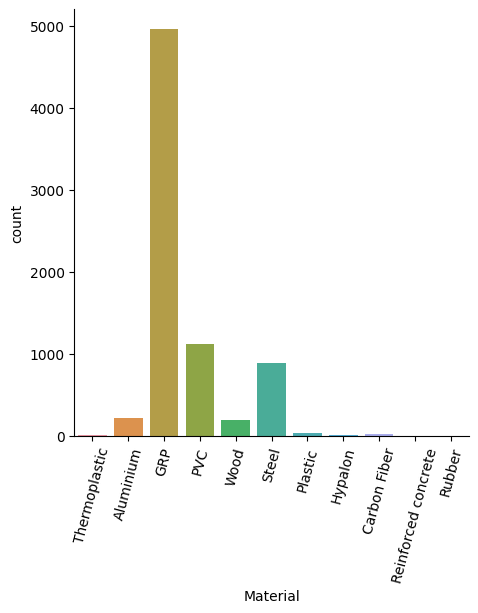

In [22]:
sns.catplot(x = 'Material', data = df_raw, kind = 'count')
plt.xticks(rotation = 75)
plt.show()

### Location

I am going to split this column by country to simplify since it is probably more important which country the boat is in than which exact body of water. Additionally, 91.5% of boats are within 9 countries so I am going to condense the country column into 9 groups plus an other to capture the remaining 8.5% of listings. 

In [23]:
df_raw['Country'] = df_raw['Location'].str.split(' ').str[0]
country_counts = df_raw.groupby(['Country']).size().reset_index(name = 'counts').sort_values(['counts'],ascending = False)
country_counts['Cumulative'] = country_counts['counts'].cumsum() / df_raw.shape[0]
country_counts

,Country,counts,Cumulative
22,Germany,1787,0.195707
31,Italy,1737,0.385938
20,France,1212,0.518673
46,Netherlands,1037,0.632242
11,Croatia,791,0.718870
...,...,...,...
45,Morocco,1,0.995619
47,Neusiedl,1,0.995729
48,NordseekÃ¼ste,1,0.995838
50,Novi,1,0.995948


In [24]:
df_raw['Country'] = np.where(df_raw['Location'].str.contains("Germany",case = False), 'Germany',
                            np.where(df_raw['Location'].str.contains("Italy",case = False), 'Italy',
                            np.where(df_raw['Location'].str.contains("France",case = False), 'France',
                            np.where(df_raw['Location'].str.contains("Netherlands",case = False), 'Netherlands',
                            np.where(df_raw['Location'].str.contains("Croatia",case = False), 'Croatia',
                            np.where(df_raw['Location'].str.contains("Switzerland",case = False), 'Switzerland',
                            np.where(df_raw['Location'].str.contains("Spain",case = False), 'Spain',
                            np.where(df_raw['Location'].str.contains("United Kingdom",case = False), 'UK',
                            np.where(df_raw['Location'].str.contains("Denmark",case = False), 'Denmark','Other')))))))))
df_raw['Country'].value_counts()

Germany        1823
Italy          1740
France         1213
Netherlands    1037
Croatia         791
Other           750
Switzerland     714
Spain           684
UK              214
Denmark         165
Name: Country, dtype: int64

# Model Development

Because this is a prediction problem using a continuous numeric variable (ratio level), I am going to look at a few algorithms for continuous predictions.

However, before I look at model performance, I need to perform some preprocessing steps

In [25]:
df_raw.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Views,Currency,Price_num,Euros,CLEAN Boat Type,Sale Type,Fuel Type,Country
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017.0,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,CHF,3337,3503.85,Motor Yacht,New Boat,None,Switzerland
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020.0,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,EUR,3490,3490.00,Center console boat,New Boat,None,Germany
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,NaN,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124,CHF,3770,3958.50,Sport Boat,New Boat,None,Switzerland
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020.0,3.00,1.00,NaN,Denmark Â» Svendborg,64,DKK,25900,3367.00,Sport Boat,New Boat,None,Denmark
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019.0,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,EUR,3399,3399.00,Other,New Boat,None,Germany


In [26]:
# Here is the clean dataset with the cleaned up features

num_variables = ['Euros','Year Built','Length','Width']
cat_variables = ['Currency','CLEAN Boat Type','Sale Type','Fuel Type','Material','Country']

df_clean = df_raw[['Views'] + num_variables + cat_variables]
df_clean.head(50)

,Views,Euros,Year Built,Length,Width,Currency,CLEAN Boat Type,Sale Type,Fuel Type,Material,Country
0,226,3503.85,2017.0,4.00,1.90,CHF,Motor Yacht,New Boat,None,NaN,Switzerland
1,75,3490.00,2020.0,4.00,1.50,EUR,Center console boat,New Boat,None,Thermoplastic,Germany
2,124,3958.50,NaN,3.69,1.42,CHF,Sport Boat,New Boat,None,Aluminium,Switzerland
3,64,3367.00,2020.0,3.00,1.00,DKK,Sport Boat,New Boat,None,NaN,Denmark
4,58,3399.00,2019.0,3.55,1.46,EUR,Other,New Boat,None,Aluminium,Germany
5,132,3832.50,NaN,4.03,1.56,CHF,Sport Boat,New Boat,None,Aluminium,Switzerland
7,134,3224.00,NaN,3.00,NaN,DKK,Sport Boat,Used Boat,None,NaN,Denmark
8,45,3333.00,2019.0,3.64,1.37,EUR,Other,New Boat,None,NaN,Germany
9,180,3300.00,2018.0,4.35,1.73,EUR,Other,New Boat,None,NaN,Italy
10,239,3675.00,1987.0,4.35,1.75,CHF,Other,Used Boat,Other,GRP,Switzerland


## Data PreProcessing

### Summary:
- Missing data: There are missing variables across a number of numeric variables but all of these missing variables are close to or fewer than 5% of the sample so I will just remove them. There are other missing values for categorical variables but those will be handled automatically during the one-hot encoding process
- One-hot encoding: I will use the pandas get_dummies method to create dummy variables from all of the categorical features. 
- Split into test and training sets with a test size of 20%
- Scale all of the variables so that no feature has more power to influence the results than others. 

### Drop Missing Data

Figure out which variables have fewer than 5% of values missing and drop them. 
For the original sample of 9,888 entries, 5% is 494 missing values but since year built is close enough and I don't think we have enough information to impute the year, I am just going to drop those. 

In [27]:
print(df_clean.isna().sum().sort_values())

Views                 0
Euros                 0
Currency              0
CLEAN Boat Type       0
Country               0
Length                7
Width                51
Sale Type            77
Year Built          529
Material           1697
Fuel Type          2123
dtype: int64


In [28]:
df_clean = df_clean.dropna(subset = ['Length','Country','Width','Sale Type','Year Built'])
print(df_clean.isna().sum().sort_values())

Views                 0
Euros                 0
Year Built            0
Length                0
Width                 0
Currency              0
CLEAN Boat Type       0
Sale Type             0
Country               0
Material           1560
Fuel Type          1956
dtype: int64


### Perform one-hot dummy Encoding

In [29]:
print(df_clean.dtypes)

Views                int64
Euros              float64
Year Built         float64
Length             float64
Width              float64
Currency            object
CLEAN Boat Type     object
Sale Type           object
Fuel Type           object
Material            object
Country             object
dtype: object


In [30]:
data = pd.get_dummies(df_clean, drop_first=True)
print("The size of data is: {}".format(data.shape))
# print(data.isna().sum().sort_values())

The size of data is: (8476, 40)


## Get Training and Test sets

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = data.drop('Views', axis = 1).values
y = data['Views'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Evaluation

After tuning the hyperparameters on many of the top regression algorithms and looking at multiple metrics of performance, a random forest was chosen to be the optimal algorithm to predict listing views. 

## Hyperparameter tuning



In [32]:
# Determine Optimal hyperparameters for various algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

kf = KFold(n_splits = 5, shuffle = True, random_state = 123)

lm = LinearRegression()
lm_cv = cross_val_score(lm,X_train,y_train,cv = kf)
lm_score = np.mean(lm_cv)
print("The best Linear score is {:.2f}".format(lm_score))

Regression_opt_params = {
    'alpha':np.arange(0.1,1,10)
}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge,Regression_opt_params, cv=kf)
ridge_cv.fit(X_train,y_train)
print("The best Ridge score is {:.2f} with parameters: {}".format(ridge_cv.best_score_,ridge_cv.best_params_))

lasso = Lasso()
lasso_cv = RandomizedSearchCV(lasso,Regression_opt_params, cv=kf)
lasso_cv.fit(X_train,y_train)
print("The best Lasso score is {:.2f} with parameters: {}".format(lasso_cv.best_score_,lasso_cv.best_params_))

KNN_opt_params= { 
    'n_neighbors' : np.arange( 2, 30, 1 ),   
    'leaf_size' : np.arange( 50, 150, 10 )
    }
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn,KNN_opt_params, cv=kf)
knn_cv.fit(X_train,y_train)
print("The best KNN score is {:.2f} with parameters: {}".format(knn_cv.best_score_,knn_cv.best_params_))

RF_opt_params= { 
    'n_estimators': np.arange(100,200,10),
    'max_depth' : np.arange(2,11,1),
    'max_features': ['sqrt', 'log2']
    }
rf = RandomForestRegressor()
rf_cv = GridSearchCV(rf,RF_opt_params, cv=kf)
rf_cv.fit(X_train,y_train)
print("The best RF score is {:.2f} with parameters: {}".format(rf_cv.best_score_,rf_cv.best_params_))

GB_opt_params={
    'n_estimators':[500,1000,2000],
    'learning_rate':[.001,0.01,.1],
    'max_depth':[1,2,4],
    'subsample':[.5,.75,1]
	}
gb = GradientBoostingRegressor()
gb_cv = RandomizedSearchCV(gb,GB_opt_params, cv=kf)
gb_cv.fit(X_train,y_train)
print("The best GB score is {:.2f} with parameters: {}".format(gb_cv.best_score_,gb_cv.best_params_))

The best Linear score is 0.26
The best Ridge score is 0.26 with parameters: {'alpha': 0.1}
The best Lasso score is 0.26 with parameters: {'alpha': 0.1}
The best KNN score is 0.06 with parameters: {'leaf_size': 50, 'n_neighbors': 29}
The best RF score is 0.33 with parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 150}
The best GB score is 0.33 with parameters: {'subsample': 1, 'n_estimators': 500, 'max_depth': 2, 'learning_rate': 0.1}


## Evaluating Model Performance

Using the above hyperparameters, I will look at model performance using a few different metrics
- R-squared from hyper parameter tuning
- Distribution of cross-validation scores
- Root-mean-squared-error
- Percent Difference calculated as (predicted - actual) / actual

The most important metric is the percent difference because in the project scope, the requirement was given that predictions needed to be within 50% of the observed views. 

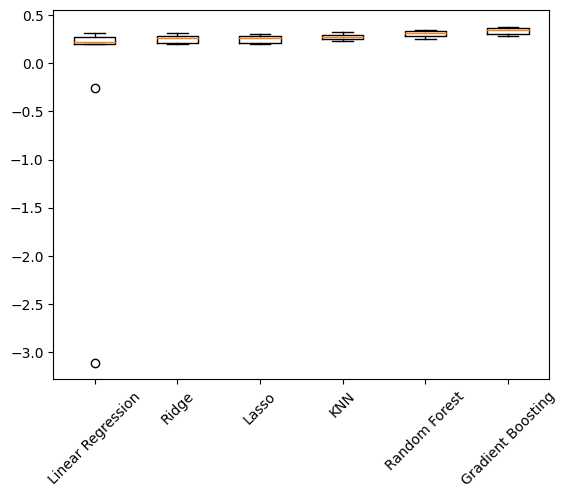

In [33]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Insert hyperparameters from above
models = {"Linear Regression": LinearRegression(), 
          "Ridge": Ridge(alpha=0.1), 
          "Lasso": Lasso(alpha=0.1),
          "KNN": KNeighborsRegressor(n_neighbors = 20,leaf_size = 45), 
          #"Random Forest": RandomForestRegressor(random_state = 123,n_estimators = 110, max_features = 'sqrt',max_depth = 10),
          "Random Forest": RandomForestRegressor(random_state = 123,n_estimators = 100),
          "Gradient Boosting":GradientBoostingRegressor(random_state = 123,subsample = 0.5,
                                                        n_estimators = 500, max_depth = 2,learning_rate = 0.1)}

results = []
# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=10, random_state=123, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.xticks(rotation = 45)
plt.show() 

In [34]:
from sklearn.metrics import mean_squared_error

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  pred_differences = np.absolute((y_pred - y_test) / y_test)
  
  # Calculate the test_rmse and % difference
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  perc_mean = np.mean(pred_differences)
  print("{} Test Set RMSE: {:.2f} and mean % difference: {:.3f}".format(name, test_rmse, perc_mean))

Linear Regression Test Set RMSE: 55.42 and mean % difference: 0.523
Ridge Test Set RMSE: 55.42 and mean % difference: 0.523
Lasso Test Set RMSE: 55.42 and mean % difference: 0.524
KNN Test Set RMSE: 53.58 and mean % difference: 0.468
Random Forest Test Set RMSE: 53.03 and mean % difference: 0.465
Gradient Boosting Test Set RMSE: 52.46 and mean % difference: 0.470


# Diving deeper into the Random Forest

In the project requirements, I was told to find an algorithm that had a performance within 50% of the actual value. While there were 3 algorithms that met this requirement, I chose to use the Random Forest because it had the lowest RMSE and the lowest % difference. 

See below for Feature Importance

In [35]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state = 123,n_estimators = 100)
#reg = GradientBoostingRegressor(random_state = 123,subsample = 0.5,n_estimators = 500, max_depth = 2,learning_rate = 0.1)
reg.fit(X_train_scaled, y_train)
predictions = reg.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error
r_squared = reg.score(X_test,y_test)
rmse = mean_squared_error(y_test, predictions, squared = False)

print("R-squared for the model: {}".format(r_squared))
print("Mean Squared Error for the model: {}".format(rmse))

R-squared for the model: -2.4047450737745093
Mean Squared Error for the model: 53.027761368678206


In [36]:
prediction_differences = np.absolute((predictions - y_test) / y_test)

# measures of central tendency
mean = np.mean(prediction_differences)
median = np.median(prediction_differences)
 
# measures of dispersion
min = np.amin(prediction_differences)
max = np.amax(prediction_differences)
range = np.ptp(prediction_differences)
variance = np.var(prediction_differences)
sd = np.std(prediction_differences)

print("Measures of Central Tendency")
print("  Mean =", mean)
print("  Median =", median)
print("Measures of Dispersion")
print("  Minimum =", min)
print("  Maximum =", max)
print("  Range =", range)
print("  Variance =", variance)
print("  Standard Deviation =", sd)

Measures of Central Tendency
  Mean = 0.4651251248559912
  Median = 0.3127948679471788
Measures of Dispersion
  Minimum = 0.0008571428571428896
  Maximum = 4.177727272727273
  Range = 4.17687012987013
  Variance = 0.262845451451654
  Standard Deviation = 0.5126845535528196


## Feature Importance of the model

From a quick look at feature importance, it appears that price is the strongest predictor of views. This is followed up by boat size and age. It also appears that boats selling in Switzerland and Germany are the most popular. After that, GRP (fiberglass) and PVC boats come to the top, followed by unleaded gas boats and motor yachts. 

In [37]:
column_names = data.columns[1:40]
values = reg.feature_importances_
df_features = pd.DataFrame({'Label': column_names, 'Importance': values})
df_features = df_features.sort_values(['Importance'],ascending = False)
df_features

,Label,Importance
0,Euros,0.219225
37,Country_Switzerland,0.152092
2,Length,0.150024
3,Width,0.130034
1,Year Built,0.118319
32,Country_Germany,0.021063
21,Material_GRP,0.017203
23,Material_PVC,0.016824
19,Fuel Type_Unleaded,0.013164
11,CLEAN Boat Type_Motor Yacht,0.013114


Text(0.5, 9.444444444444438, 'Feature Importance Score')

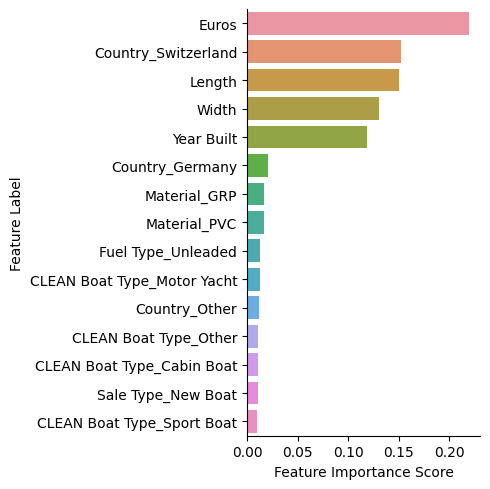

In [38]:
sns.catplot(y = 'Label', x = 'Importance', 
            data = df_features[df_features['Importance'] > .01].sort_values(['Importance'],ascending = False),kind = 'bar')
plt.ylabel('Feature Label')
plt.xlabel('Feature Importance Score')